<a href="https://colab.research.google.com/github/fbtkdqo/2020-2-AI/blob/master/code/10W_2_wine_classcification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5.1 이항 분류

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [2]:
# 5.1 와인 데이터셋 불러오기
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

In [3]:
print(red.shape)
print(white.shape)

(1599, 12)
(4898, 12)


In [4]:
# 5.2 와인 데이터셋 합치기
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

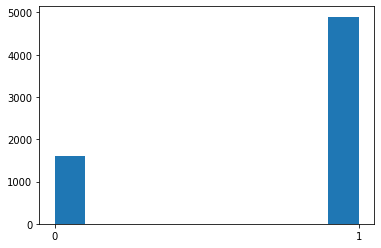

1    4898
0    1599
Name: type, dtype: int64


In [5]:
# 5.3 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
#plt.xticks([0, 1], ['red', 'white'])
plt.show()

print(wine['type'].value_counts())

In [6]:
# 5.4 데이터 요약 정보 확인
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [7]:
# 5.5 데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

In [8]:
# 5.6 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
4076       0.297521          0.193333     0.156627  ...  0.347826  0.333333   1.0
1344       0.289256          0.100000     0.222892  ...  0.608696  0.833333   1.0
3361       0.214876          0.060000     0.162651  ...  0.275362  0.500000   1.0
4100       0.206612          0.140000     0.138554  ...  0.376812  0.500000   1.0
112        0.380165          0.346667     0.060241  ...  0.260870  0.333333   0.0

[5 rows x 13 columns]
[[0.29752066 0.19333333 0.15662651 0.13803681 0.06810631 0.11111111
  0.29493088 0.17293233 0.31782946 0.13483146 0.34782609 0.33333333
  1.        ]
 [0.2892562  0.1        0.22289157 0.01993865 0.05315615 0.17361111
  0.36635945 0.07113939 0.41860465 0.1011236  0.60869565 0.83333333
  1.        ]
 [0.21487603 0.06       0.1626506  0.14263804 0.06312292 0.08680556
  0.21889401 0.17061885 0.48062016 0.15730337 0.27536232 0.5
  1.        ]
 [0.20661157 0.14       0.13855422 0.20858

In [9]:
# 5.7 train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.29752066 0.19333333 0.15662651 0.13803681 0.06810631 0.11111111
 0.29493088 0.17293233 0.31782946 0.13483146 0.34782609 0.33333333]
1.0
[0.33057851 0.24       0.1686747  0.03220859 0.15116279 0.05902778
 0.20506912 0.18295739 0.3875969  0.25280899 0.20289855 0.33333333]
0.0
[0. 1.]
[1. 0.]


In [10]:
# 5.8 와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


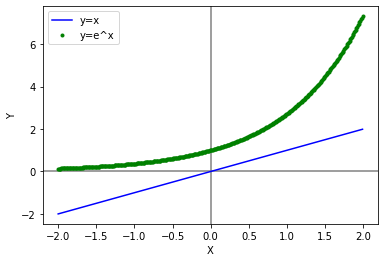

In [11]:
# 그림 5.5 출력 코드
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [12]:
# 5.9 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.1430 - accuracy: 0.9461 - val_loss: 0.0386 - val_accuracy: 0.9892
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9784 - val_loss: 0.0303 - val_accuracy: 0.9900
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9864 - val_loss: 0.0227 - val_accuracy: 0.9915
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9892 - val_loss: 0.0480 - val_accuracy: 0.9846
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9841 - val_loss: 0.0311 - val_accuracy: 0.9885
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9882 - val_loss: 0.0267 - val_accuracy: 0.9923
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9882 - val_loss: 0.0466 - val_accuracy: 0.9831
Epoch 

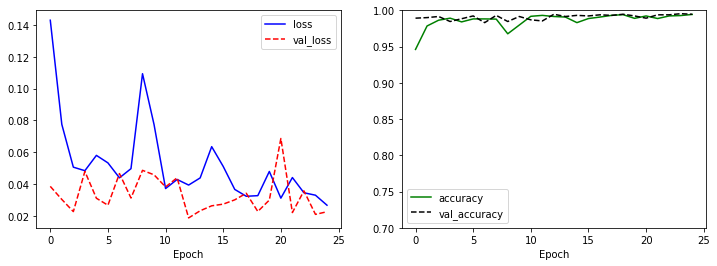

In [13]:
# 5.10 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [14]:
# 5.11 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 812us/step - loss: 0.0393 - accuracy: 0.9908


[0.039266083389520645, 0.9907692074775696]

5.2 다항 분류

In [15]:
# 5.12 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


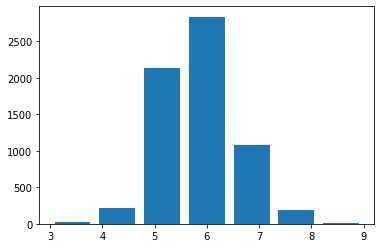

In [16]:
# 5.13 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [17]:
# 5.14 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [18]:
# 5.15 데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [19]:
# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.8016 - val_loss: 0.4487 - val_accuracy: 0.7908
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8037 - val_loss: 0.4303 - val_accuracy: 0.7908
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8016 - val_loss: 0.4247 - val_accuracy: 0.7908
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.7996 - val_loss: 0.4342 - val_accuracy: 0.7908
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8065 - val_loss: 0.4268 - val_accuracy: 0.7977
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8047 - val_loss: 0.4461 - val_accuracy: 0.7908
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8037 - val_loss: 0.4246 - val_accuracy: 0.7931
Epoch 

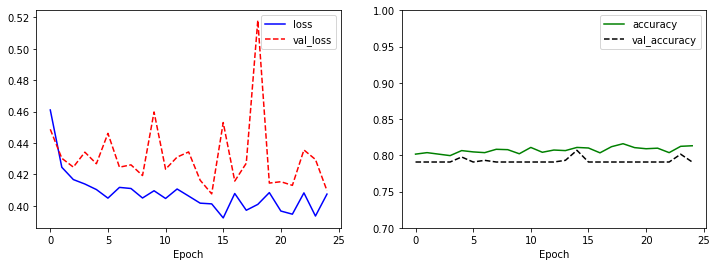

In [20]:
# 5.17 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [21]:
# 5.18 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 993us/step - loss: 0.3746 - accuracy: 0.8054


[0.3745844066143036, 0.805384635925293]

5.3 Fashion MNIST

In [22]:
# 5.19 Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

4423680/4422102 [==============================] - 0s 0us/step
60000 10000


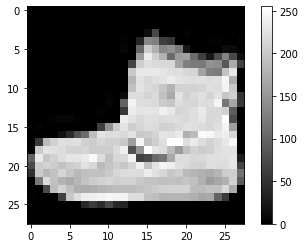

9


In [23]:
# 5.20 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [24]:
# 5.21 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [25]:
# 5.22 Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 5.23 Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5292 - accuracy: 0.8151 - val_loss: 0.4699 - val_accuracy: 0.8261
Epoch 2/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3952 - accuracy: 0.8585 - val_loss: 0.3829 - val_accuracy: 0.8599
Epoch 3/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3581 - accuracy: 0.8703 - val_loss: 0.3599 - val_accuracy: 0.8710
Epoch 4/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3271 - accuracy: 0.8812 - val_loss: 0.3494 - val_accuracy: 0.8729
Epoch 5/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3073 - accuracy: 0.8870 - val_loss: 0.3382 - val_accuracy: 0.8791
Epoch 6/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2886 - accuracy: 0.8943 - val_loss: 0.3417 - val_accuracy: 0.8775
Epoch 7/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2783 - accuracy: 0.8965 - val_loss: 0.3346 - val_accuracy:

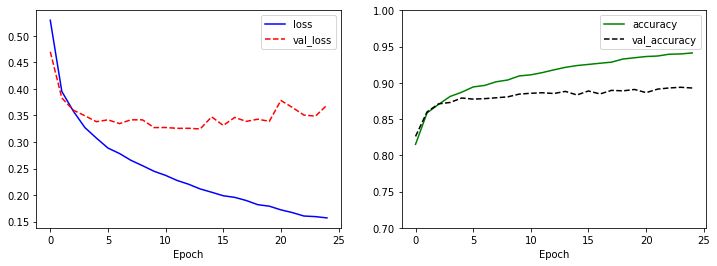

In [27]:
# 5.24 Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [28]:
# 5.25 Fashion MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8825


[0.39917078614234924, 0.8824999928474426]